In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

In [2]:
start = '2010-01-01'
end = date.today()
data = yf.download('AAPL',start,end)
df = data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507528,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800
...,...,...,...,...,...,...
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,45143500
2023-05-25,172.410004,173.899994,171.690002,172.990005,172.990005,56058300
2023-05-26,173.320007,175.770004,173.110001,175.429993,175.429993,54794100


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507528,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,45143500
2023-05-25,172.410004,173.899994,171.690002,172.990005,172.990005,56058300
2023-05-26,173.320007,175.770004,173.110001,175.429993,175.429993,54794100
2023-05-30,176.960007,178.990005,176.570007,177.300003,177.300003,55964400
2023-05-31,177.330002,179.350006,176.759995,177.250000,177.250000,99561200


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507528,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [6]:
df = df.drop(['Date','Adj Close'], axis = 1)

In [7]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


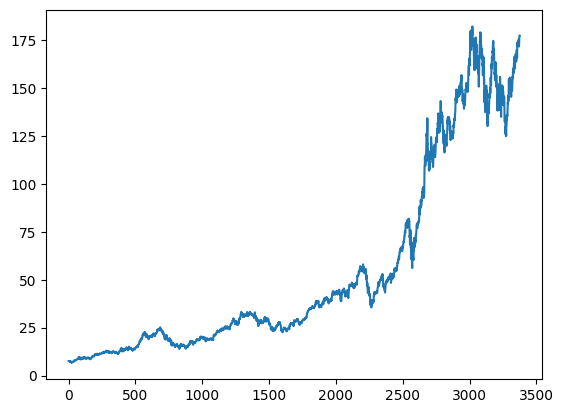

In [8]:
plt.plot(df.Close)

ma100 = moving average of 100 days

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3370    155.0870
3371    155.5176
3372    156.0212
3373    156.5306
3374    157.0529
Name: Close, Length: 3375, dtype: float64

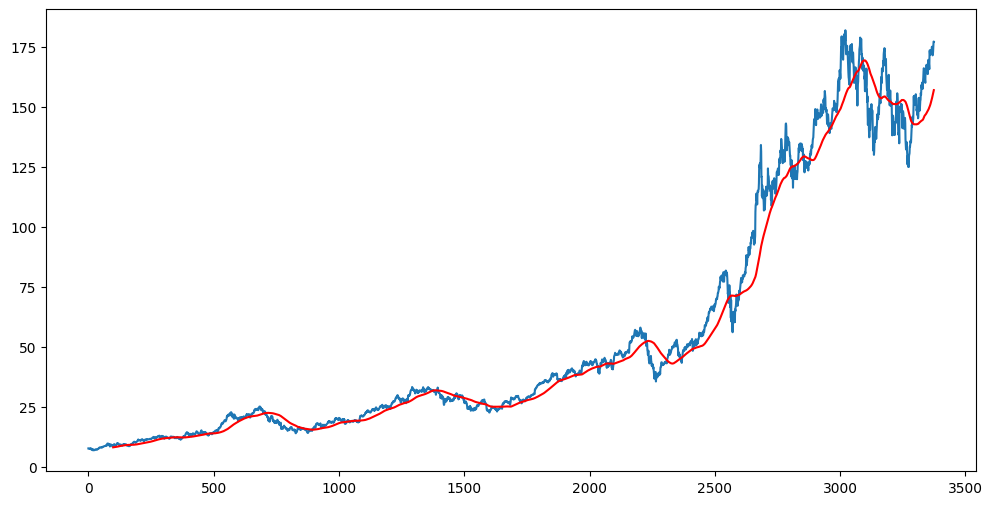

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3370    152.24955
3371    152.28990
3372    152.32085
3373    152.36490
3374    152.39065
Name: Close, Length: 3375, dtype: float64

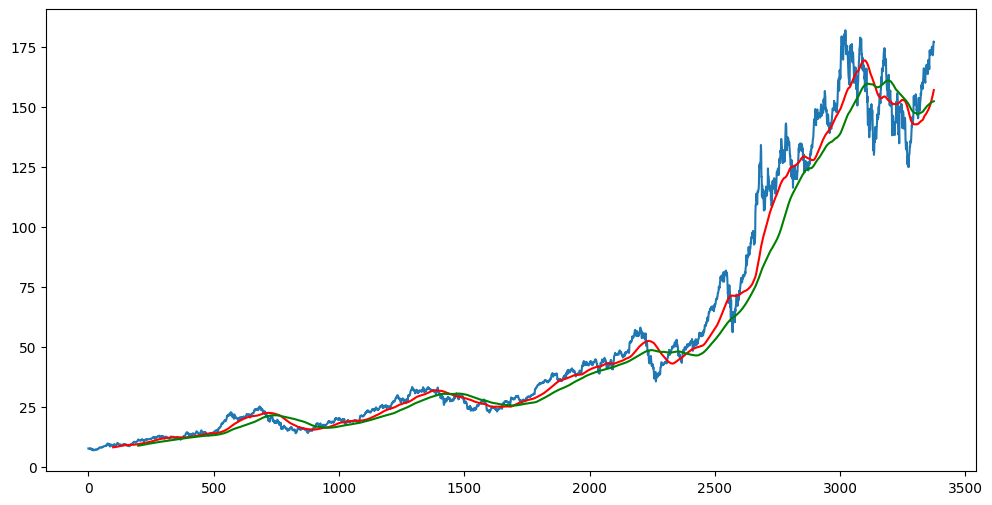

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(3375, 5)

Splitting data into training and testing

In [14]:
data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2362, 1)
(1013, 1)


In [15]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [16]:
data_testing.head()

,Close
2362,44.915001
2363,44.742500
2364,44.557499
2365,44.345001
2366,44.575001


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.76064612],
       [0.77779872],
       [0.75913124]])

In [19]:
data_training_array.shape

(2362, 1)

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

ML Model 

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
#Layer 1
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences=True, 
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

#Layer 2
model.add(LSTM(units = 60, activation= 'relu', return_sequences=True))
model.add(Dropout(0.3))

#Layer 3
model.add(LSTM(units = 80, activation= 'relu', return_sequences=True))
model.add(Dropout(0.4))

#Layer 4
model.add(LSTM(units = 120, activation= 'relu'))
model.add(Dropout(0.5))

#Dense Layer
model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 80)

Epoch 1/80
71/71 [==============================] - 19s 182ms/step - loss: 0.0360
Epoch 2/80
71/71 [==============================] - 14s 191ms/step - loss: 0.0073
Epoch 3/80
71/71 [==============================] - 14s 196ms/step - loss: 0.0059
Epoch 4/80
71/71 [==============================] - 18s 258ms/step - loss: 0.0062
Epoch 5/80
71/71 [==============================] - 20s 286ms/step - loss: 0.0057
Epoch 6/80
71/71 [==============================] - 20s 275ms/step - loss: 0.0056
Epoch 7/80
71/71 [==============================] - 20s 279ms/step - loss: 0.0047
Epoch 8/80
71/71 [==============================] - 21s 295ms/step - loss: 0.0045
Epoch 9/80
71/71 [==============================] - 18s 249ms/step - loss: 0.0044
Epoch 10/80
71/71 [==============================] - 19s 261ms/step - loss: 0.0040
Epoch 11/80
71/71 [==============================] - 17s 234ms/step - loss: 0.0042
Epoch 12/80
71/71 [==============================] - 15s 210ms/step - loss: 0.0038
Epoch 13/80
7

In [25]:
model.save('keras_model.h5')

Working with testing data

In [26]:
data_testing.head()

,Close
2362,44.915001
2363,44.742500
2364,44.557499
2365,44.345001
2366,44.575001


In [27]:
data_training.tail(100)

,Close
2262,39.057499
2263,39.435001
2264,39.480000
2265,35.547501
2266,37.064999
...,...
2357,47.520000
2358,47.250000
2359,45.772499
2360,46.650002


In [28]:
past_100_days = data_training.tail(100)

In [29]:
final_df = pd.concat([past_100_days,data_testing],ignore_index=True)
final_df

,Close
0,39.057499
1,39.435001
2,39.480000
3,35.547501
4,37.064999
...,...
1108,171.839996
1109,172.990005
1110,175.429993
1111,177.300003


In [30]:
final_df.head()

,Close
0,39.057499
1,39.435001
2,39.480000
3,35.547501
4,37.064999


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02396517],
       [0.02654264],
       [0.02684987],
       ...,
       [0.95507381],
       [0.96784165],
       [0.96750025]])

In [32]:
input_data.shape

(1113, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1013, 100, 1)
(1013,)


Making Predictions

In [35]:
y_predicted = model.predict(x_test)

32/32 [==============================] - 3s 66ms/step


In [36]:
y_predicted.shape

(1013, 1)

In [37]:
y_test

array([0.06395836, 0.06278058, 0.06151744, ..., 0.95507381, 0.96784165,
       0.96750025])

In [38]:
y_predicted

array([[0.16597164],
       [0.16377532],
       [0.16153008],
       ...,
       [0.8443028 ],
       [0.84368926],
       [0.8447749 ]], dtype=float32)

In [39]:
scaler.scale_

array([0.00682769])

In [40]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

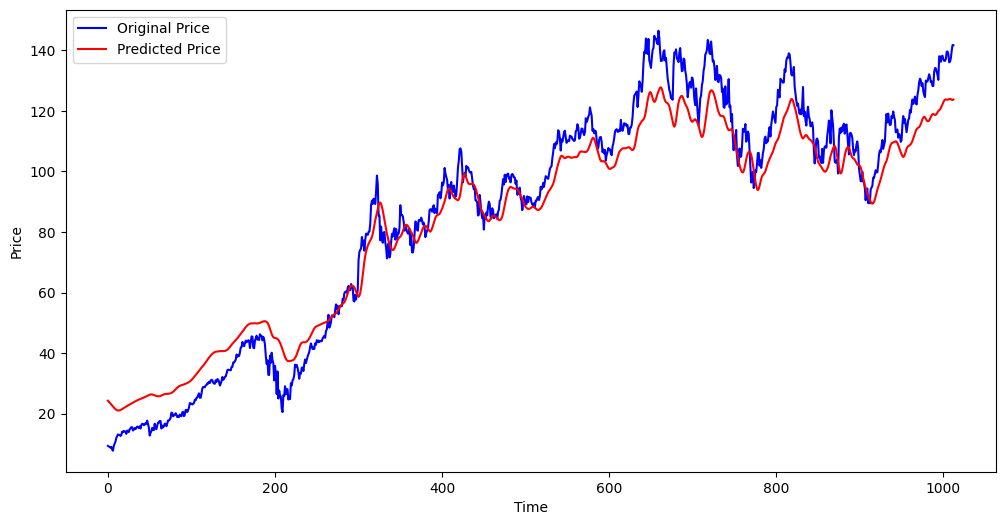

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()